In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-1bce6601-59b4-43d4-99ef-fa9df7fbb637.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]),
                           Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
                           Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
                           Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
                           Object(name=cereal0, pos=[0.4

# Start Scene 

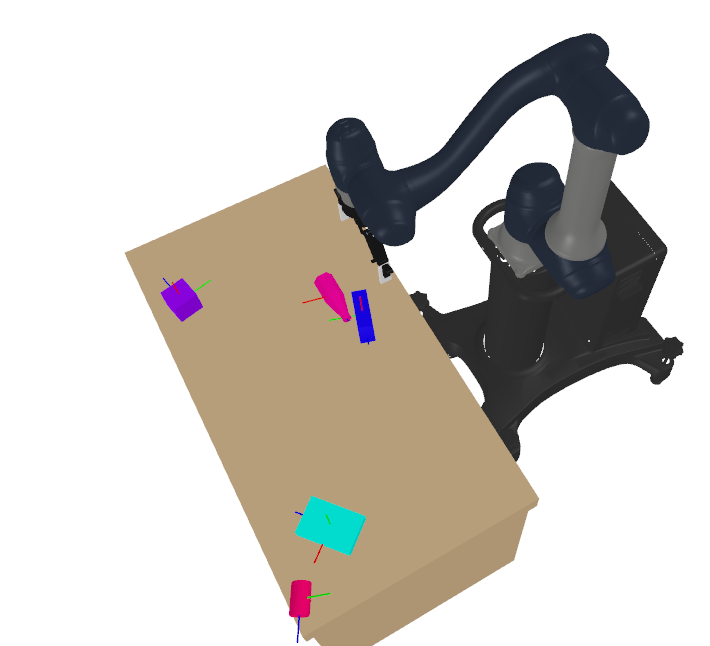

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]), 'can0': Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]), 'can1': Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]), 'milk0': Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]), 'cereal0': Object(name=cereal0, pos=[0.43695543 0.12948806 0.88526188])}


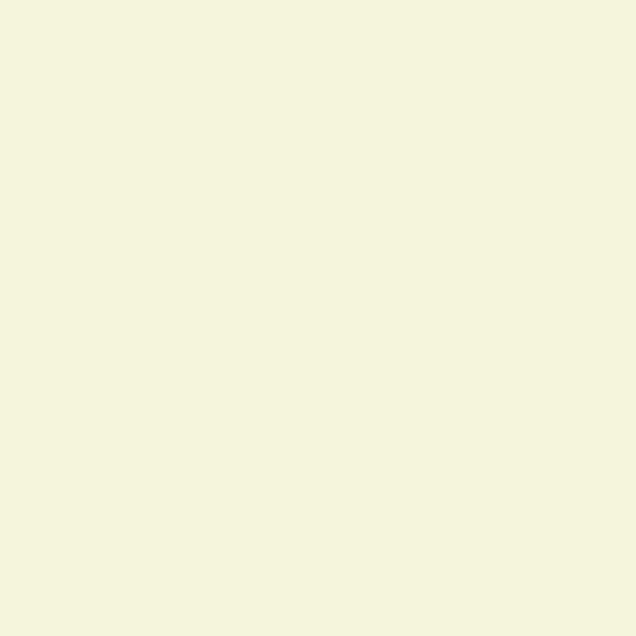

In [2]:
#######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
# rearrangement1.render_axis_2(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# Goal Scene 

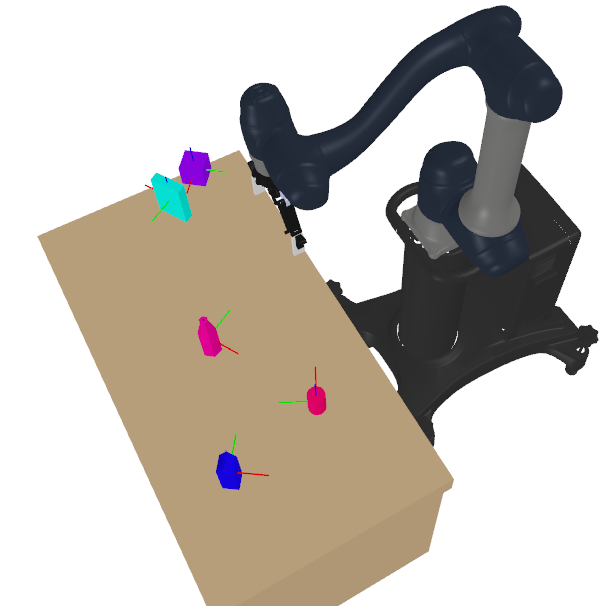

In [3]:
# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.5356105  0.17191691 0.84779998]), 'can0': Object(name=can0, pos=[0.29896213 0.01771398 0.85059666]), 'can1': Object(name=can1, pos=[ 0.4043516  -0.157966    0.85059666]), 'milk0': Object(name=milk0, pos=[ 0.44086927 -0.03354331  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.42959145 -0.33381047  0.88526188])}


In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [3]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 1 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(9) -> A(13) -> S'(17) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(17) -> A(20) -> S'(23) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(23) -> A(25) -> S'(31) Reward : 4.0
[Action] Rearr can0
placed another place not goal
[Reward] S(31) -> A(32) -> S'(40) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(40) -> A(44) -> S'(47) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(47) -> A(52) -> S'(55) Reward : 2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(55) -> A(60) -> S'(62) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(62) -> A(65) -> S'(69) Reward : 2.0
[Action] Rearr milk0
Good Action
[Reward] S(69) -> A(73) -> S'(76) Reward 

[Action] Rearr cereal0
placed another place not goal
[Reward] S(368) -> A(373) -> S'(375) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(375) -> A(378) -> S'(381) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(381) -> A(383) -> S'(388) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(388) -> A(393) -> S'(394) Reward : 2.857
[Action] Rearr can0
placed another place not goal
[Reward] S(394) -> A(396) -> S'(400) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(400) -> A(402) -> S'(405) Reward : -2.5
[Action] Rearr ben_cube0
Bad Action
[Reward] S(405) -> A(406) -> S'(411) Reward : -2.222
[Action] Rearr can1
Good Action
[Reward] S(411) -> A(415) -> S'(417) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  11.060313701629639 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 7 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(695) -> A(696) -> S'(702) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(702) -> A(709) -> S'(710) Reward : 2.857
[Action] Rearr milk0
Good Action
[Reward] S(710) -> A(717) -> S'(718) Reward : 2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(718) -> A(720) -> S'(725) Reward : 2.222
[Action] Rearr can1
placed another place not goal
[Reward] S(725) -> A(727) -> S'(731) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(731) -> A(735) -> S'(736) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  19.548156023025513 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 12 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(418) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(418) -> A(419) -> S'(737) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(737) -> A(741)

[Action] Rearr can0
placed another place not goal
[Reward] S(999) -> A(1002) -> S'(1006) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(1006) -> A(1010) -> S'(1014) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1014) -> A(1016) -> S'(1021) Reward : 2.0
[Action] Rearr cereal0
Good Action
[Reward] S(1021) -> A(1027) -> S'(1028) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  27.70148515701294 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 17 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(9) -> A(14) -> S'(1029) Reward : 6.667
[Action] Rearr can0
placed another place not goal
[Reward] S(1029) -> A(1032) -> S'(1036) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(1036) -> A(1039) -> S'(1043) Reward : -5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(1043) ->

[Action] Rearr cereal0
placed another place not goal
[Reward] S(1308) -> A(1314) -> S'(1316) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(1316) -> A(1321) -> S'(1323) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  35.84716749191284 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 22 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(220) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(220) -> A(221) -> S'(1324) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1324) -> A(1326) -> S'(1332) Reward : 5.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1332) -> A(1335) -> S'(1339) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1339) -> A(1340) -> S'(1346) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(1346) -> A(1351) -> S'(1353) Reward : 2.857
[Action] Rearr can1
Good Action

placed another place not goal
[Reward] S(1609) -> A(1615) -> S'(1617) Reward : -1
Exceeded the maximum depth!!
########### Running time :  43.78284406661987 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 27 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(361) Reward : 10.0
[Action] Rearr can0
placed another place not goal
[Reward] S(361) -> A(364) -> S'(1618) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(1618) -> A(1621) -> S'(1624) Reward : -6.667
[Action] Rearr milk0
Good Action
[Reward] S(1624) -> A(1629) -> S'(1631) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1631) -> A(1637) -> S'(1639) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1639) -> A(1640) -> S'(1645) Reward : 2.857
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1645) -> A(1651) -> S'(1653) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(1653) -> A(1659) -> S'(166

[Action] Rearr can0
placed another place not goal
[Reward] S(1910) -> A(1913) -> S'(1918) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1918) -> A(1926) -> S'(1927) Reward : 4.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1927) -> A(1931) -> S'(1935) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1935) -> A(1937) -> S'(1941) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(1941) -> A(1948) -> S'(1949) Reward : -2.857
[Action] Rearr can1
Good Action
[Reward] S(1949) -> A(1954) -> S'(1957) Reward : 2.222
[Action] Rearr milk0
Good Action
[Reward] S(1957) -> A(1962) -> S'(1965) Reward : 2.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1965) -> A(1970) -> S'(1972) Reward : -1
Exceeded the maximum depth!!
########### Running time :  53.76578640937805 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 33 ===========
[Action] Rearr can1
placed another place no

Good Action
[Reward] S(2221) -> A(2227) -> S'(2229) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2229) -> A(2235) -> S'(2237) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2237) -> A(2240) -> S'(2245) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2245) -> A(2251) -> S'(2253) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2253) -> A(2256) -> S'(2260) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2260) -> A(2261) -> S'(2268) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2268) -> A(2274) -> S'(2276) Reward : -1
Exceeded the maximum depth!!
########### Running time :  61.83967041969299 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 38 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(361) Reward : 10.0
[Action] Rearr cereal0
placed anoth

Good Action
[Reward] S(2493) -> A(2499) -> S'(2501) Reward : 4.0
[Action] Rearr can0
Good Action
[Reward] S(2501) -> A(2505) -> S'(2510) Reward : 3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(2510) -> A(2512) -> S'(2518) Reward : 2.857
[Action] Rearr cereal0
Good Action
[Reward] S(2518) -> A(2524) -> S'(2525) Reward : 2.5
[Action] Rearr can1
Good Action
[Reward] S(2525) -> A(2529) -> S'(2531) Reward : 2.222
##########['milk0', 'can0', 'ben_cube0', 'cereal0', 'can1']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  69.20384430885315 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 43 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(418) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(418) -> A(424) -> S'(2532) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2532) -> A(2533) -> S'(2540) Reward 

KeyboardInterrupt: 

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

29.65714285714286

In [5]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   5,
   361,
   367,
   2277,
   2279,
   2284,
   2286,
   2291,
   2296,
   2297,
   2301,
   2303,
   2304,
   2309,
   2313,
   2316,
   2318,
   2323,
   2327,
   2328],
  'value': 23.183261183261187},
 1: {'nodes': [0,
   8,
   9,
   10,
   679,
   680,
   2493,
   2499,
   2501,
   2505,
   2510,
   2512,
   2518,
   2524,
   2525,
   2529,
   2531],
  'value': 16.112698412698407},
 2: {'nodes': [0,
   2,
   153,
   158,
   2652,
   2659,
   2660,
   2667,
   2668,
   2673,
   2674,
   2676,
   2678],
  'value': 28.59047619047619},
 3: {'nodes': [0,
   2,
   153,
   159,
   2679,
   2684,
   2687,
   2690,
   2693,
   2696,
   2700,
   2703,
   2706,
   2711,
   2712],
  'value': 29.65714285714286}}

In [6]:
########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

Result 3 :  [0, 2, 153, 159, 2679, 2684, 2687, 2690, 2693, 2696, 2700, 2703, 2706, 2711, 2712]
state num : 15


# get Point cloud 

Obtain a point cloud from the scene to grasp and the scene to place.

In more detail, on the basis of the object to be manipulated, obtain the point cloud transformed from the point cloud of the grasp scene to the object pose of the place scene.

In [7]:
state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

In [8]:
state_list, action_list

([0, 153, 2679, 2687, 2693, 2700, 2706, 2712],
 [2, 159, 2684, 2690, 2696, 2703, 2711])

In [9]:
for i in range(len(max_value_nodes)//2):
    print("current state : ", max_value_nodes[2*i])
    print("action : ", max_value_nodes[2*i + 1])
    print("next state : ", max_value_nodes[2*(i+1)])
    
    print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
    current_state_pc, current_count = pc_utils.get_obj_point_clouds(
                                rearrangement1.init_scene,
                                mcts.tree.nodes[max_value_nodes[2*i]]['state'],
                                mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                                )
    next_state_pc, next_count = pc_utils.get_obj_point_clouds(
                                rearrangement1.init_scene,
                                mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
                                mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                                )
    
    print()
    
    if i>6:
        break
    

current state :  0
action :  2
next state :  153
manipulate object ben_cube0

current state :  153
action :  159
next state :  2679
manipulate object milk0

current state :  2679
action :  2684
next state :  2687
manipulate object can1

current state :  2687
action :  2690
next state :  2693
manipulate object milk0

current state :  2693
action :  2696
next state :  2700
manipulate object can0

current state :  2700
action :  2703
next state :  2706
manipulate object milk0

current state :  2706
action :  2711
next state :  2712
manipulate object cereal0



In [10]:

print(mcts.tree.nodes[max_value_nodes[2*i]]['state'].objs[mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']].h_mat)
print(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'].objs[mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']].h_mat)

[[-0.99904397  0.04371656  0.          0.43695543]
 [-0.04371656 -0.99904397  0.          0.12948806]
 [ 0.          0.          1.          0.88526188]
 [ 0.          0.          0.          1.        ]]
[[ 0.90548881  0.42437014  0.          0.42959145]
 [-0.42437014  0.90548881  0.         -0.33381047]
 [ 0.          0.          1.          0.88526188]
 [ 0.          0.          0.          1.        ]]


### Combine point cloud

In [11]:
combined_pc = pc_utils.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'],
                                        current_state_pc,
                                        next_state_pc,
                                        next_count
                                       )
mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

'cereal0'

## render trimesh scene 

In [12]:
# mcts.render_state("cur_state", mcts.tree.nodes[max_value_nodes[2*(i)]]['state'], close_gripper=False)
mcts.render_state("next_state", mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'], close_gripper=False)


# Current Scene (the scene to grasp)

5000


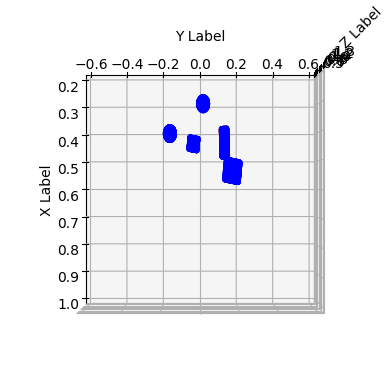

In [13]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(current_state_pc))

table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(current_state_pc[:, 0], current_state_pc[:, 1], current_state_pc[:, 2], c='b', marker='.')
ax.scatter(current_state_pc[1000*current_count:1000*(current_count+1), 0], current_state_pc[1000*current_count:1000*(current_count+1), 1], current_state_pc[1000*current_count:1000*(current_count+1), 2], c='r', marker='.')

ax.set_xlim(.2,1.0)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()

#################### 
all_pc = np.vstack([current_state_pc, table_point_cloud])

# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1000, 3), dtype=np.uint8)  # RGB colors (0-255)
pc = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc)
# Set the camera viewpoint

# Set point size and color
# scene.set_vertex_colors([0, 255, 0, 255])  # Set point color to green
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

# Next Scene (the scene to place object)

5000


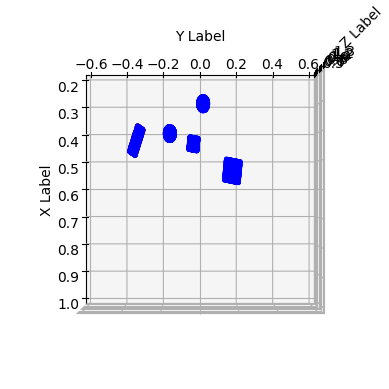

In [15]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  rearrangement1.get_support_space_point_cloud()

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(next_state_pc))

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(next_state_pc[:, 0], next_state_pc[:, 1], next_state_pc[:, 2], c='b', marker='.')
ax.scatter(next_state_pc[1000*current_count:1000*(current_count+1), 0], next_state_pc[1000*current_count:1000*(current_count+1), 1], next_state_pc[1000*current_count:1000*(current_count+1), 2], c='r', marker='.')
ax.set_xlim(.2,1.0)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()

#################### 
# 포인트 클라우드를 렌더링
all_pc = np.vstack([next_state_pc, table_point_cloud])

colors = np.random.randint(0, 255, (1000, 3), dtype=np.uint8)  # RGB colors (0-255)
pc = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc)
# Set the camera viewpoint

# Set point size and color
# scene.set_vertex_colors([0, 255, 0, 255])  # Set point color to green
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

# Combined Scene

5000
cereal0


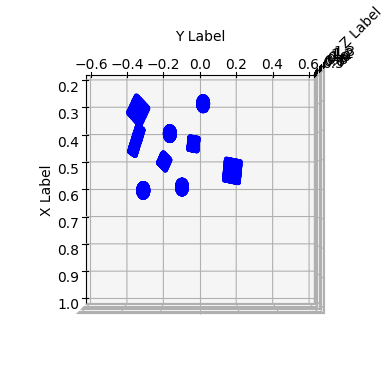

In [17]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(next_state_pc))
print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_pc[:, 0], combined_pc[:, 1], combined_pc[:, 2], c='b', marker='.')

ax.set_xlim(.2,1.0)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

all_pc = np.vstack([combined_pc, table_point_cloud])

pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)
# Set the camera viewpoint

# Set point size and color
# scene.set_vertex_colors([0, 255, 0, 255])  # Set point color to green
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

#######################################################################################################

In [14]:
idx = 0
val_ = -np.inf
for k,v in mcts.history_level_1_dict.items():
    if val_ < v['value']:
        idx = k
        val_ = v['value']
        
max_value_nodes = mcts.history_level_1_dict[2]['nodes']
mcts.render_rearr("_", max_value_nodes)
# idx, max_value_nodes

In [3]:
mcts.do_planning_rearrange(0)

mcts.visualize_tree("Siccess nodes", mcts.tree)

=========== Search iteration : 1 ===========
Possible action :  [{'table': array([[-0.65439006, -0.75615716,  0.        ,  0.81258534],
       [ 0.75615716, -0.65439006,  0.        ,  0.59000015],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'table': array([[-0.85692728, -0.51543732,  0.        ,  0.60659851],
       [ 0.51543732, -0.85692728,  0.        ,  0.38424777],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]
Possible action :  [{'table': array([[ 0.49456394, -0.86914125,  0.        ,  0.69975171],
       [ 0.86914125,  0.49456394,  0.        ,  0.56444204],
       [ 0.        ,  0.        ,  1.        ,  0.85059666],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]
Possible action :  [{'table': array([[ 0.91856648, -0.39526653,  0.        ,  0.32757333],
       [ 0.39526653,  0.91856648,  0.        ,  0.338

KeyError: 'place_obj_name'

In [19]:
mcts.rearr_action.scene_mngr.init_scene.objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.51224777 -0.30205152  0.84779998]),
 'can0': Object(name=can0, pos=[0.52298875 0.45872414 0.85059666]),
 'can1': Object(name=can1, pos=[0.57888044 0.07873193 0.83516771]),
 'milk0': Object(name=milk0, pos=[ 0.82293572 -0.52496244  0.83236691]),
 'cereal0': Object(name=cereal0, pos=[ 0.4360076  -0.25732616  0.86029978])}

# Scene collision info 

In [ ]:
col_info = {}

def get_h_mat(position=np.zeros(3), orientation=np.array([1.0, 0.0, 0.0, 0.0])):
    """
    Returns homogeneous matrix from position and orientation
    """
    position = np.asarray(position)
    orientation = np.asarray(orientation)
    if orientation.shape == (3,):  # RPY Euler angles
        R = get_matrix_from_rpy(orientation)
    elif orientation.shape == (4,):  # quaternion in the form [x,y,z,w]
        R = get_matrix_from_quaternion(orientation)
    elif orientation.shape == (3, 3):  # Rotation matrix
        R = orientation

    H = np.vstack((np.hstack((R, position.reshape(-1, 1))), np.array([[0, 0, 0, 1]])))
    return H

for name, info in mcts.init_scene.collision_manager._objs.items():
    T = get_h_mat(
        position=info["obj"].getTranslation(),
        orientation=info["obj"].getRotation(),
    )
    col_info[name] = T

# Collision check

In [14]:
idx = 4148
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'milk0': array([[ 0.96655143, -0.25647288,  0.        ,  0.88596138],
       [ 0.25647288,  0.96655143,  0.        , -0.40701088],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'milk0': array([[ 0.49220865,  0.87047725,  0.        ,  0.81366052],
       [-0.87047725,  0.49220865,  0.        ,  0.0371563 ],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [15]:
idx = 4153
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'bottle0': array([[-0.14103772,  0.99000422,  0.        ,  0.82751786],
       [-0.99000422, -0.14103772,  0.        , -0.4207895 ],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'bottle0': array([[-0.05088925, -0.9987043 ,  0.        ,  0.62542366],
       [ 0.9987043 , -0.05088925,  0.        , -0.24336767],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [23]:
mcts.render_rearr_state( None,title =  '_', state = mcts.tree.nodes[idx]['state'])

In [25]:
mcts.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.7449755  0.50675499 0.84779998]),
 'bottle0': Object(name=bottle0, pos=[ 0.74971138 -0.29269512  0.83593753]),
 'can0': Object(name=can0, pos=[0.58752796 0.31872161 0.83500836]),
 'milk0': Object(name=milk0, pos=[ 0.47826872 -0.11880885  0.83236691])}

In [24]:
idx, list(mcts.rearr_action.get_goal_location_not_collision(mcts.tree.nodes[idx]['state'],mcts.tree.nodes[idx]['action']['rearr_poses']))

(862,
 [{'can0': array([[ 0.71035039, -0.70384822,  0.        ,  0.7415683 ],
          [ 0.70384822,  0.71035039,  0.        , -0.55474858],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'can0': array([[-0.17171101,  0.98514736,  0.        ,  0.83996994],
          [-0.98514736, -0.17171101,  0.        , -0.27054348],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])}])

In [47]:
mcts.scene_mngr.obj_collision_mngr.get_collision_info()

{'table': array([[ 1.   ,  0.   ,  0.   ,  1.   ],
        [ 0.   ,  1.   ,  0.   , -0.6  ],
        [ 0.   ,  0.   ,  1.   ,  0.043],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]),
 'ben_cube0': array([[ 0.        ,  0.78165694, -0.62370861,  0.84763533],
        [ 0.        ,  0.62370861,  0.78165694,  0.36753831],
        [ 1.        ,  0.        ,  0.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[-0.65291822,  0.75742841,  0.        ,  0.83010826],
        [-0.75742841, -0.65291822,  0.        , -0.20864996],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'ben_cube1': array([[-0.17287648,  0.98494351,  0.        ,  0.49591774],
        [ 0.98494351,  0.17287648,  0.        ,  0.45601634],
        [ 0.        ,  0.        , -1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[-0.81254636,  

In [18]:
for name, obj in mcts.rearr_action.scene_mngr.scene.objs.items():
    print(name, obj.h_mat)

table [[ 1.     0.     0.     1.   ]
 [ 0.     1.     0.    -0.6  ]
 [ 0.     0.     1.     0.043]
 [ 0.     0.     0.     1.   ]]
ben_cube0 [[-0.34614189 -0.93818217  0.          0.46298891]
 [ 0.93818217 -0.34614189  0.          0.02937996]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle0 [[-0.65291822  0.75742841  0.          0.83010826]
 [-0.75742841 -0.65291822  0.         -0.20864996]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
ben_cube1 [[-0.19514173  0.98077505  0.          0.96563102]
 [-0.98077505 -0.19514173  0.          0.29412445]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle1 [[-0.81254636  0.58289657  0.          0.38289801]
 [-0.58289657 -0.81254636  0.          0.37264649]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
